<a href="https://colab.research.google.com/github/shivashankarenagandula/ML_Projects/blob/main/MNIST_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded:
X_train: (60000, 784)
Number of 5s in training set: 5918

=== Baseline Evaluation (default threshold) ===
Confusion Matrix:
 [[53562   520]
 [  609  5309]]
Precision: 0.9107908732201063
Recall: 0.8970936127069956
ROC-AUC: 0.9878749264865954

=== Auto Threshold Tuning (NEW FEATURE) ===
Chosen Threshold: 2779.7061991230667
Precision at threshold: 0.9501443695861406
Recall at threshold: 0.834065562690098

=== Error Analysis (NEW FEATURE) ===
False Positives: 259
False Negatives: 982


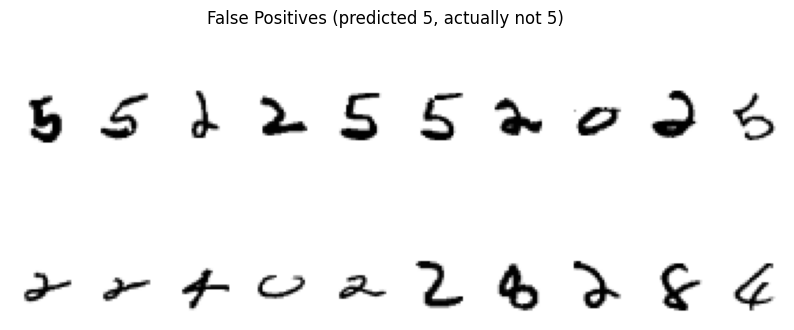

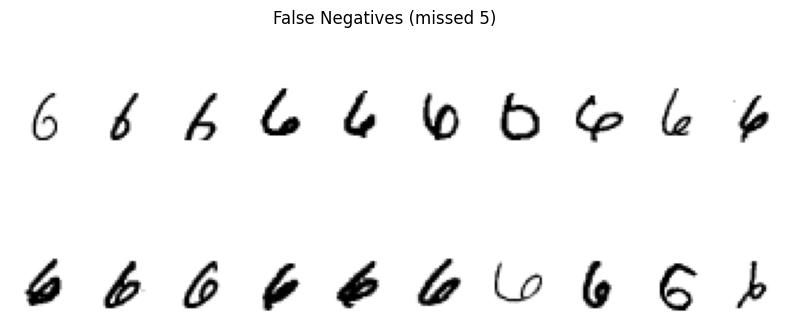

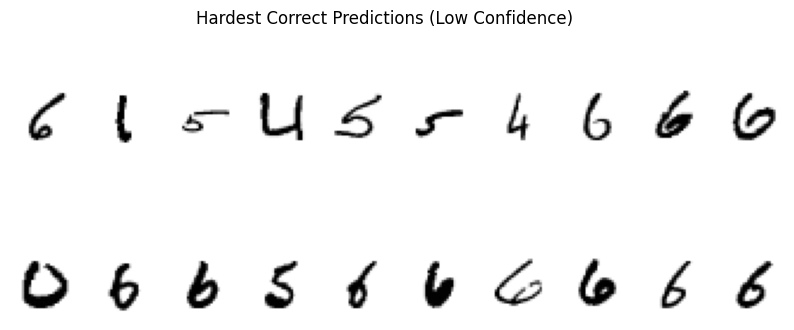


=== PROJECT EXECUTION COMPLETE ===


In [13]:
# ==============================
# MNIST Classification Project
# Single-Cell Execution
# ==============================

# ---- Imports ----
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    precision_recall_curve,
    roc_auc_score
)

# ---- Load MNIST ----
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# ---- Train/Test Split ----
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# ---- Binary Labels (5 vs Not-5) ----
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print("Data loaded:")
print("X_train:", X_train.shape)
print("Number of 5s in training set:", y_train_5.sum())

# ---- Train Classifier ----
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# ---- Cross-validated decision scores ----
y_scores = cross_val_predict(
    sgd_clf,
    X_train,
    y_train_5,
    cv=3,
    method="decision_function"
)

# ---- Basic Evaluation ----
y_pred_default = (y_scores >= 0)

print("\n=== Baseline Evaluation (default threshold) ===")
print("Confusion Matrix:\n", confusion_matrix(y_train_5, y_pred_default))
print("Precision:", precision_score(y_train_5, y_pred_default))
print("Recall:", recall_score(y_train_5, y_pred_default))
print("ROC-AUC:", roc_auc_score(y_train_5, y_scores))

# =====================================================
# EXTRA FEATURE 1: AUTO THRESHOLD TUNING
# =====================================================

def find_threshold_for_precision(y_true, scores, target_precision=0.95):
    precisions, recalls, thresholds = precision_recall_curve(y_true, scores)
    for p, r, t in zip(precisions[:-1], recalls[:-1], thresholds):
        if p >= target_precision:
            return t, p, r
    return thresholds[-1], precisions[-1], recalls[-1]

threshold, p, r = find_threshold_for_precision(
    y_train_5, y_scores, target_precision=0.95
)

print("\n=== Auto Threshold Tuning (NEW FEATURE) ===")
print("Chosen Threshold:", threshold)
print("Precision at threshold:", p)
print("Recall at threshold:", r)

# =====================================================
# EXTRA FEATURE 2: ERROR ANALYSIS GALLERY
# =====================================================

def show_mnist_images(X, indices, title, n=20):
    plt.figure(figsize=(10, 4))
    for i, idx in enumerate(indices[:n]):
        plt.subplot(2, n//2, i + 1)
        plt.imshow(X[idx].reshape(28, 28), cmap="binary")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

preds_custom = (y_scores >= threshold)

false_positives = np.where((preds_custom == True) & (y_train_5 == False))[0]
false_negatives = np.where((preds_custom == False) & (y_train_5 == True))[0]

print("\n=== Error Analysis (NEW FEATURE) ===")
print("False Positives:", len(false_positives))
print("False Negatives:", len(false_negatives))

show_mnist_images(X_train, false_positives, "False Positives (predicted 5, actually not 5)")
show_mnist_images(X_train, false_negatives, "False Negatives (missed 5)")

# =====================================================
# HARD CORRECT EXAMPLES (BONUS)
# =====================================================

correct_idx = np.where(preds_custom == y_train_5)[0]
confidence = np.abs(y_scores[correct_idx] - threshold)
hardest_correct = correct_idx[np.argsort(confidence)[:20]]

show_mnist_images(X_train, hardest_correct, "Hardest Correct Predictions (Low Confidence)")

print("\n=== PROJECT EXECUTION COMPLETE ===")


In [16]:
mnist_784.head()

NameError: name 'mnist_784' is not defined